In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load data: diabetes dataset 

In [2]:
columns = "age sex bmi map tc ldl hdl tch ltg glu".split()
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [3]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### Doing train/test split

In [4]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


### Fit linear model, predict and visualize results in a scatter plot

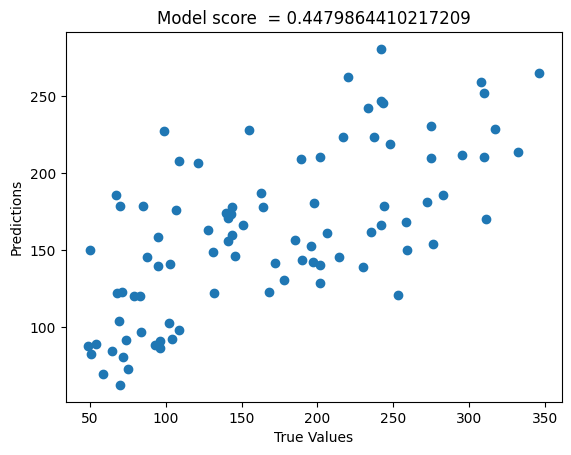

In [5]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Model score  = {}".format(model.score(X_test, y_test)))
plt.show()

### Observación:
Si ejecutamos todo el código anterior, obtendremos diferentes resultados porque no hemos puesto semilla ...
entonces ... cuál es el "bueno"  ??!!??

In [6]:
scores = []
for x in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    scores.append(model.score(X_test, y_test))
    print("Model score  = {}".format(model.score(X_test, y_test)))
    
print("Average: {}, Stdev: {}".format(np.mean(scores), np.std(scores)))

Model score  = 0.5261199289136138
Model score  = 0.36804422171639917
Model score  = 0.3485522431177952
Model score  = 0.41096240673112916
Model score  = 0.5052032017166436
Model score  = 0.49616611556269186
Model score  = 0.46632045256203536
Model score  = 0.5517957957595593
Model score  = 0.49089465328491366
Model score  = 0.508577974485797
Average: 0.46726369938505785, Stdev: 0.06500570570817951


### Cross-validation .. better estimates (at least more stable -- i.e. less variance)

In [7]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(model, df, y, cv=10)
print("Cross-validated scores: {}".format(scores))

Cross-validated scores: [0.5561455  0.23055827 0.35357673 0.62190752 0.2658727  0.61819798
 0.41815142 0.43513747 0.43436229 0.68569253]


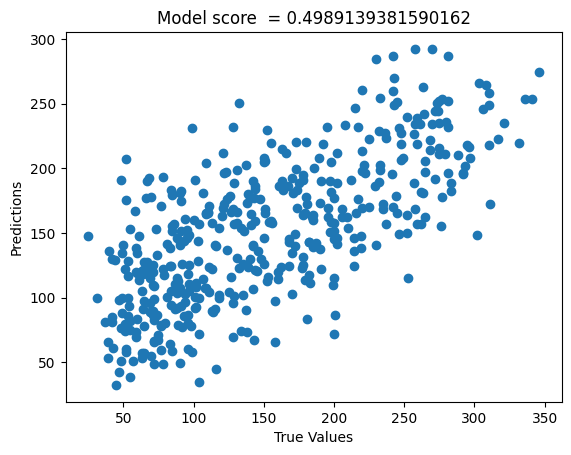

In [8]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
predictions = cross_val_predict(model, df, y, cv=kf)
plt.scatter(y, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Model score  = {}".format(metrics.r2_score(y, predictions)))
plt.show()

In [90]:
scores = []
for x in range(10):
    predictions = cross_val_predict(model, df, y, cv=kf)
    scores.append(metrics.r2_score(y, predictions))
    print("Model score  = {}".format(metrics.r2_score(y, predictions)))
    
print("Average: {}, Stdev: {}".format(np.mean(scores), np.std(scores)))

Model score  = 0.4954979523838303
Model score  = 0.4932548547489424
Model score  = 0.4880695861870157
Model score  = 0.4903332129840512
Model score  = 0.4871284594186198
Model score  = 0.49115447188435046
Model score  = 0.49460013952955006
Model score  = 0.48986390983581274
Model score  = 0.49046040211206554
Model score  = 0.49051127561002483
Average: 0.49108742646942627, Stdev: 0.0025311233215743727
